# 1.Linear Regression

##### 首先制造出我们的数据集

In [14]:
import random
def assmuing_function(x):

    return 16 * x + 6 + random.randint(-27, 27)

In [31]:
X=[x for x in range(0, 16)]

In [32]:
y = [assmuing_function(x) for x in X]

In [33]:
X

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [34]:
y

[-7, 41, 64, 62, 46, 87, 103, 120, 154, 147, 177, 177, 195, 241, 254, 247]

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

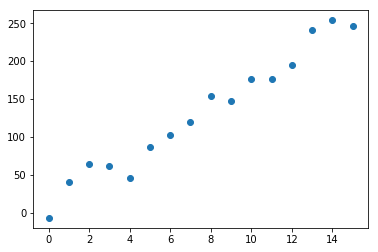

In [35]:
plt.scatter(X, y)

##### 划分数据集拟合

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [37]:
X_train

[6, 10, 4, 1, 14, 0, 15, 9, 8, 12, 11, 5]

In [38]:
X_test

[3, 13, 7, 2]

In [39]:
y_train

[103, 177, 46, 41, 254, -7, 247, 147, 154, 195, 177, 87]

##### 因为sklearn的输入需要是向量而不是列表，所以我们处理下数据

In [41]:
import numpy as np

In [42]:
def list_to_array(l):
    return np.array(l)

In [49]:
X_train=list_to_array(X_train)
X_test=list_to_array(X_test)

In [55]:
X_train

array([ 6, 10,  4,  1, 14,  0, 15,  9,  8, 12, 11,  5])

In [50]:
X_train.shape

(12,)

In [56]:
#因为LinearRegression()输入需要时列向量，所以这里要reshape一下。reshape(-1，1)代表转换为 ? x 1 的维度
X_train.reshape(-1, 1)

array([[ 6],
       [10],
       [ 4],
       [ 1],
       [14],
       [ 0],
       [15],
       [ 9],
       [ 8],
       [12],
       [11],
       [ 5]])

In [52]:
X_train.reshape(-1, 1).shape

(12, 1)

In [59]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train.reshape(-1, 1), y_train)

In [60]:
#reg.predict其实就是
def predict(x): 
    return reg.coef_ * x + reg.intercept_

In [61]:
#看看和我们assmuing_function中的16和6差多少
print(reg.coef_)
print(reg.intercept_)

[16.80733052]
2.0253000324360357


因为我们的random.randint是加在reg.intercept_上的，所以扰动很大

In [65]:
y_pred = reg.predict(X_test.reshape(-1, 1))

In [66]:
from sklearn import metrics
metrics.mean_squared_error(y_test, y_pred)

328.7641446943772

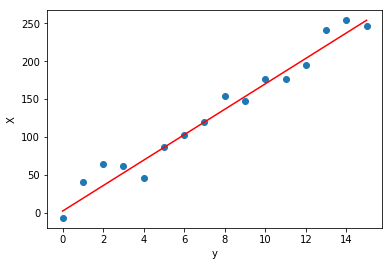

In [70]:
fig, ax = plt.subplots()
ax.set_xlabel('y')
ax.set_ylabel('X')
ax.scatter(X, y)
ax.plot(X, reg.predict(list_to_array(X).reshape(-1, 1)), color='red')

# 2.KNN

In [157]:
#封装一个KNN，方法包括train，predict这种
class KNN():
    def __init__(self,k=1,distance='L2'):
        self.k=k
        self.distance=distance
    #KNN并没有传统意义上的训练过程，这里我们存入所有的训练集数据就可以了
    def fit(self, X, y):
       self.X_train = X
       self.y_train = y       
    #输入X和k，输出预测类别
    def predict(self, X):
        #这里的dist函数是计算X和所有X_train的距离
        dists = self.distances(X)
        num_test = dists.shape[0]
        y_pred = np.zeros(num_test)
        for i in range(num_test):
             #np.argsort排出k个距离最小的X_train索引
             closest_y = self.y_train[np.argsort(dists[i])[0:self.k]]   
             #bincount选出most common
             y_pred[i] = np.bincount(closest_y).argmax()
        return y_pred
    def distances(self, X):
        if self.distance=='L2':
            return self.L2_distances(X)
        raise Exception("输入的距离度量无效")
        
    def L2_distances(self, X):
            num_test = X.shape[0]
            num_train = self.X_train.shape[0]
            dists = np.zeros((num_test, num_train))
            #(x-y)^2=x^2 + y^2 -2xy
            dists += np.sum(self.X_train ** 2, axis=1).reshape(1, num_train)
            dists += np.sum(X ** 2, axis=1).reshape(num_test, 1) 
            dists -= 2 * np.dot(X, self.X_train.T)
            dists = np.sqrt(dists)
            return dists

##### 接下来让我们制造些适合分类的数据

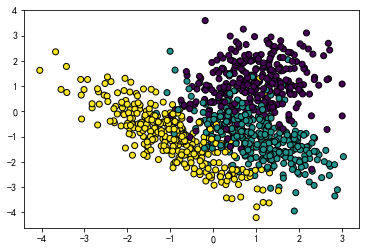

In [190]:
from sklearn.datasets.samples_generator import make_classification
# 1000个样本，每个样本2个特征，共有3个类别，每个类别一个簇
X, Y = make_classification(n_samples=1000, n_features=2,n_redundant=0,n_clusters_per_class=1, n_classes=3)
plt.scatter(X[:, 0], X[:, 1], marker='o',edgecolors='k', c=Y)

In [115]:
X.shape

(1000, 2)

In [143]:
Y.shape

(1000,)

现在训练集有1000个样本了，接下来是测试集。我们用meshgrid取样使得测试集填满画布

In [191]:
#训练集的边界
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
#在边界内生成随机数据来做测试集，然后作预测
x, y = np.meshgrid(np.arange(x_min, x_max, 0.2),np.arange(y_min, y_max, 0.2))

In [192]:
x.shape

(49, 46)

In [193]:
#拉直
x.ravel().shape

(2254,)

In [194]:
#横向拼接
X_test=np.c_[x.ravel(), y.ravel()]

In [195]:
X_test.shape

(2254, 2)

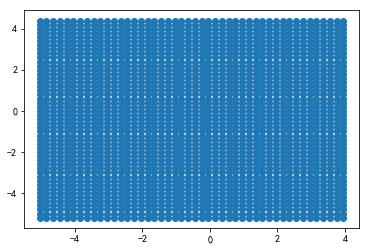

In [196]:
plt.scatter(X_test[:, 0], X_test[:, 1], marker='o')

好了，现在我们的测试集有2565个样本

##### 接下来就可以预测，作图了

In [197]:
clf = KNN(k = 15)

In [198]:
clf.fit(X, Y)

In [199]:
Z = clf.predict(X_test)

In [200]:
Z.shape

(2254,)

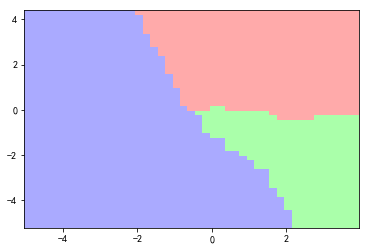

In [201]:
from matplotlib.colors import ListedColormap
#[0，1，2]类对应的颜色[红色，绿色，蓝色]
test = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
# 画出测试集的预测结果
plt.pcolormesh(x,y,Z.reshape(x.shape), cmap=test)

Text(0.5, 1.0, '背景颜色代表测试数据结果，实点代表训练数据')

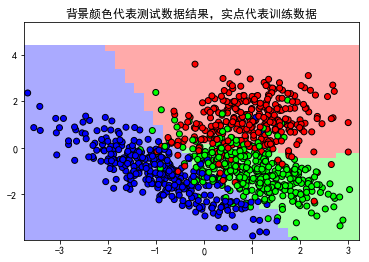

In [203]:
#把训练集的数据也都标上
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
#[0，1，2]类对应的颜色[R，G，B]
train = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
plt.pcolormesh(x,y,Z.reshape(x.shape), cmap=test)
plt.scatter(X[:, 0], X[:, 1],  marker='o',edgecolors='k',c=Y, cmap=train)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("背景颜色代表测试数据结果，实点代表训练数据" )

In [204]:
#我们输入要预测的坐标是(1,2)
test_input=(1,2)

In [205]:
category=clf.predict(np.array(test_input).reshape(-1,2))

In [206]:
category

array([0.])

说明输入是第0类，对应图中红色区域。

# 3.Decision Tree 

之前在学西瓜书的时候，我写过一个和西瓜书公式一一对应的CART实现(包含分类树和回归树)。这里就直接贴过来上CART吧,毕竟常用的，GBDT中用的是CART。

In [117]:
#先看一下数据集
def createDataSet(n):
    """
    创建数据集
    """
    if n == 'clf':
        dataSet = [[u'3',u'12', u'学生', u'未婚'],                                  #分类树
                    [u'4',u'18', u'学生', u'未婚'],
                    [u'2',u'26', u'老师', u'已婚'],            
                    [u'5',u'47', u'上班族', u'已婚'],
                    [u'2.5',u'36', u'上班族', u'已婚'],
                    [u'3.5',u'29', u'老师', u'未婚'],
                    [u'4',u'21', u'学生', u'已婚'],
                   ]

        labels = [u'看电视时间',u'年龄', u'职业', u'婚姻情况']  
    
    if n=='reg':
    
        dataSet = [[u'3',u'未婚', u'学生', u'12'],                                 #回归树
                    [u'4',u'未婚', u'学生', u'18'],
                    [u'2',u'已婚', u'老师', u'26'],
                    [u'5',u'已婚', u'上班族', u'47'],
                    [u'2.5',u'已婚', u'上班族', u'36'],
                    [u'3.5',u'未婚', u'老师', u'29'],
                    [u'4',u'已婚', u'学生', u'21'],
                    ]

        labels = [u'看电视时间',u'婚姻情况', u'职业', u'年龄']
    return dataSet, labels

计算基尼指数，页码对应西瓜书的页码

In [91]:
def calcGini(dataSet):
    """
    Gini(D)=1-∑pk^2
    P79    4.5
    """
    numEntries = len(dataSet)                       
    labelCounts ={}
    for featVec in dataSet:
        currentLabel = featVec[-1]                                             #提取出类别
        if currentLabel not in labelCounts.keys():
            labelCounts[currentLabel] =0
        labelCounts[currentLabel]+=1
    Gini =1.0                                                                  #Gini=1
    for key in labelCounts:                                                    #∑
        prob = float(labelCounts[key])/numEntries                              #pk=
        Gini -= prob * prob                                                    #-pk^2
    return Gini

最优特征点选择

In [70]:
def chooseBestFeatureToSplitByCART(dataSet,labels):
    """
    分类树
    Gini_index(D,a)=∑(Dv/D)Gini(Dv)
    P79    4.6
    """
    numFeatures = len(dataSet[0]) -1          
    bestGiniIndex = 1000000.0
    bestSplictValue =[]
    bestFeature = -1
    for i in range(numFeatures):
        featList = [example[i] for example in dataSet]                         #提取每个样本的i特征组成列表，就是提取出表格中的列
        if featList[0].isdigit():
            featList=process(featList)                                         #替换成中位数集合
        uniqueVals = set(featList)                          
        bestGiniCut = 1000000.0
        bestGiniCutValue =[]
        Gini_value =0.0
        for value in uniqueVals:                                               #对于不同特征
            subDataSet = splitDataSet(dataSet,i,value)
            prob = len(subDataSet) / float(len(dataSet))                       #DL/D
            Gini_value = prob * calcGini(subDataSet)                           #(DL/D)*Gini(DL)
            otherDataSet = splitOtherDataSetByValue(dataSet,i,value)
            prob = len(otherDataSet) / float(len(dataSet))                     #DR/D
            Gini_value = Gini_value + prob * calcGini(otherDataSet)            #+(DR/D)*Gini(DL)
            if Gini_value < bestGiniCut:
                bestGiniCut = Gini_value
                bestGiniCutValue = value                                       #记录最小基尼指数的特征
        GiniIndex = bestGiniCut                                                #上一个bestGiniCut是单个特征中对不同属性划分
        if  GiniIndex < bestGiniIndex :                                        #这个是对不同特征找出最小的基尼指数
            bestGiniIndex = GiniIndex
            bestSplictValue = bestGiniCutValue
            bestFeature = i                                                    #记下特征的列数            
    binaryDivideDataSet(bestFeature,bestSplictValue,dataSet)
    return bestFeature

def RegressionSplitByCART(dataSet,labels):
    """
    回归树
    """
    
    numFeatures = len(dataSet[0]) -1          
    BESTMSE = 1000000.0
    BESTMSEValue =[]
    bestFeature = -1
    for i in range(numFeatures):
        featList = [example[i] for example in dataSet]                         #提取每个样本的i特征组成列表，就是提取出表格中的列
        if featList[0].isdigit():
            featList=process(featList)                                         #替换成中位数集合
        uniqueVals = set(featList)                          
        bestMSE = 1000000.0
        prob1=0.0
        prob2=0.0
        bestMSEValue =[]
        for value in uniqueVals:                                               #对于不同特征
            subDataSet = splitDataSet(dataSet,i,value)                         #对原始数据集第i列(特征)根据属性value进行划分
            classList = [example[-1] for example in subDataSet]                #提取出回归值
            classList =list(map(float,classList))                              #字符串转为浮点数
            m=mean(classList)                                                  #平均数
            for j in range(len(classList)):
                prob1+=float(classList[j])**2
            prob1=(prob1-len(classList)*(m**2))**0.5
            otherDataSet = splitOtherDataSetByValue(dataSet,i,value)
            classList = [example[-1] for example in otherDataSet]
            classList =list(map(float,classList))                              #字符串转为浮点数
            if classList==[]:
                break
            m=mean(classList)                                                  #平均数
            for k in range(len(classList)):
                prob2+=float(classList[k])**2
            prob2=(prob2-len(classList)*(m**2))**0.5
            prob=prob1+prob2
            if prob < bestMSE:
                bestMSE = prob
                bestMSEValue = value                                           #记录最小基尼指数的特征
        MSE = bestMSE                                                          #上一个bestGiniCut是单个特征中对不同属性划分
        if  MSE < BESTMSE :                                                    #这个是对不同特征找出最小的基尼指数
            BESTMSE = MSE
            BESTMSEValue = bestMSEValue
            bestFeature = i                                                    #记下特征的列数            
    binaryDivideDataSet(bestFeature,BESTMSEValue,dataSet)
    return bestFeature

        

持续的特征选择

In [59]:
def splitDataSet(dataSet,axis,value):
    """
    根据传进axis列特征属性value划分数据集，同时删除返回数据集中value属性          DL
    """ 
    retDataSet = []
    if type(value)==float:                                                     #连续值划分
       for featVec in dataSet:
           if float(featVec[axis]) <= value:
              reduceFeatVec = featVec[:axis]
              reduceFeatVec.extend(featVec[axis+1:])
              retDataSet.append(reduceFeatVec)
       return  retDataSet
    for featVec in dataSet:
        if featVec[axis] != value:                                             #若不是指定特征
            reduceFeatVec = featVec[:axis]                                     #删除这个特征
            reduceFeatVec.extend(featVec[axis+1:])
            retDataSet.append(reduceFeatVec)                                   #这行(这个样本)加入数据集
    return retDataSet

def splitOtherDataSetByValue(dataSet,axis,value):
    """
    根据传进axis列特征属性value划分数据集，同时删除返回数据集中value属性          DR
    """
    retDataSet = [] 
    if type(value)==float:                                                     #连续值划分
       for featVec in dataSet:
           if float(featVec[axis]) > value:
              reduceFeatVec = featVec[:axis]
              reduceFeatVec.extend(featVec[axis+1:])
              retDataSet.append(reduceFeatVec)
       return  retDataSet

    for featVec in dataSet:
        if featVec[axis] == value:                                             #找到指定特征
            reduceFeatVec = featVec[:axis]                                     #下面这两步删除这个特征，切片左闭右开
            reduceFeatVec.extend(featVec[axis+1:])              
            retDataSet.append(reduceFeatVec)                                   #这行(这个样本)加入数据集
    return retDataSet

def binaryDivideDataSet(bestFeature,bestSplitValue,dataSet):
    """
    二元划分，划分为等于该属性和不等于该属性
    """
    featList = [example[bestFeature] for example in dataSet]                   #提取bestFeature列作为列表
    uniqueValues = set(featList)                                               #特征属性个数
    if type(bestSplitValue)==float:                                            #连续值进行划分，分为大于和小于
       for i in range(len(dataSet)):
                    if float(dataSet[i][bestFeature]) <= bestSplitValue:
                         dataSet[i][bestFeature] = '<='+str(bestSplitValue)
                    else:
                        dataSet[i][bestFeature] = '>'+str(bestSplitValue)
    else:
        if len(uniqueValues) >= 2:
                for i in range(len(dataSet)):
                    if dataSet[i][bestFeature] == bestSplitValue:              #标量进行划分时，分为等于该属性和不等于该属性
                        pass
                    else:
                                 dataSet[i][bestFeature] = '其他'

其他的一些的函数

In [100]:
import operator
def mean(a):
    if a==[]:
        return 0
    return sum(a) / len(a)

def majorityCnt(classList):
    """
    返回出现次数最多的分类名称
    """

    classCount = {}
    for vote in classList:
        if vote not in classCount.keys(): classCount[vote] = 0  
        classCount[vote] +=1                                                   
    sortedClassCount = sorted(classCount.items(),key = operator.itemgetter(1),reverse = True)  
    return sortedClassCount[0][0]
def process(featList):
    """
     P84 4.7
    """                                                         
    avg_List=[]
    featList.sort()
    for i in range(len(featList)-1):
        avg_List.append((float(featList[i])+float(featList[i+1]))/2)
    return avg_List

可视化决策树需要的函数

In [112]:
#确保图上能显示出中文
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
decisionNode = dict(boxstyle="sawtooth", fc="0.8")  # 定义分支点的样式
leafNode = dict(boxstyle="round4", fc="0.8")  # 定义叶节点的样式
arrow_args = dict(arrowstyle="<-")  # 定义箭头标识样式


# 计算树的叶子节点数量
def getNumLeafs(myTree):
   numLeafs = 0
   firstStr = list(myTree.keys())[0]
   secondDict = myTree[firstStr]
   for key in secondDict.keys():
      if type(secondDict[key]).__name__ == 'dict':
         numLeafs += getNumLeafs(secondDict[key])
      else:
         numLeafs += 1
   return numLeafs


# 计算树的最大深度
def getTreeDepth(myTree):
   maxDepth = 0
   firstStr = list(myTree.keys())[0]
   secondDict = myTree[firstStr]
   for key in secondDict.keys():
      if type(secondDict[key]).__name__ == 'dict':
         thisDepth = 1 + getTreeDepth(secondDict[key])
      else:
         thisDepth = 1
      if thisDepth > maxDepth:
         maxDepth = thisDepth
   return maxDepth


# 画出节点
def plotNode(nodeTxt, centerPt, parentPt, nodeType):
   createPlot.ax1.annotate(nodeTxt, xy=parentPt, xycoords='axes fraction', \
                           xytext=centerPt, textcoords='axes fraction', va="center", ha="center", \
                           bbox=nodeType, arrowprops=arrow_args)


# 标箭头上的文字
def plotMidText(cntrPt, parentPt, txtString):
   lens = len(txtString)
   xMid = (parentPt[0] + cntrPt[0]) / 2.0 - lens * 0.002
   yMid = (parentPt[1] + cntrPt[1]) / 2.0
   createPlot.ax1.text(xMid, yMid, txtString)


def plotTree(myTree, parentPt, nodeTxt):
   numLeafs = getNumLeafs(myTree)
   depth = getTreeDepth(myTree)
   firstStr = list(myTree.keys())[0]
   cntrPt = (plotTree.x0ff + \
             (1.0 + float(numLeafs)) / 2.0 / plotTree.totalW, plotTree.y0ff)
   plotMidText(cntrPt, parentPt, nodeTxt)
   plotNode(firstStr, cntrPt, parentPt, decisionNode)
   secondDict = myTree[firstStr]
   plotTree.y0ff = plotTree.y0ff - 1.0 / plotTree.totalD
   for key in secondDict.keys():
      if type(secondDict[key]).__name__ == 'dict':
         plotTree(secondDict[key], cntrPt, str(key))
      else:
         plotTree.x0ff = plotTree.x0ff + 1.0 / plotTree.totalW
         plotNode(secondDict[key], \
                  (plotTree.x0ff, plotTree.y0ff), cntrPt, leafNode)
         plotMidText((plotTree.x0ff, plotTree.y0ff) \
                     , cntrPt, str(key))
   plotTree.y0ff = plotTree.y0ff + 1.0 / plotTree.totalD


def createPlot(inTree):
   fig = plt.figure(1, facecolor='white')
   fig.clf()
   axprops = dict(xticks=[], yticks=[])
   createPlot.ax1 = plt.subplot(111, frameon=False, **axprops)
   plotTree.totalW = float(getNumLeafs(inTree))
   plotTree.totalD = float(getTreeDepth(inTree))
   plotTree.x0ff = -0.5 / plotTree.totalW
   plotTree.y0ff = 1.0
   plotTree(inTree, (0.5, 1.0), '')
   plt.show()


创建决策树

In [62]:
def createTree(dataSet,labels,chooseBestFeatureToSplitFunc):
    """
    创建决策树
    P74      图4.2
    """
    classList = [example[-1] for example in dataSet]                           #类别列表
    if classList.count(classList[0]) == len(classList):                        #统计属于classList[0]的个数
        return classList[0]                                                    #如果等式成立说明D中样本全属于同一类别C
    if len(dataSet[0]) ==1:                                                    #注意递归中参数传进去的是retDatase所以dataset有切分
        return majorityCnt(classList)                                          #D中样本A取值相同，类别标记为D中样本数最多的类
    bestFeat = chooseBestFeatureToSplitFunc(dataSet,labels)                    #提取出最佳特征的列数
    bestFeatLabel = labels[bestFeat]                                           #提取出划分的特征
    #print(bestFeatLabel)
    myTree ={bestFeatLabel:{}}                                                 #字典结构，key为featureLabel
    del (labels[bestFeat])                                                     #划分完了从标签里删除
    featValues = [example[bestFeat] for example in dataSet]                    #提取出划分特征的列
    uniqueVals = set(featValues)                                               #该特征的属性
    for value in uniqueVals:
        subLabels = labels[:]                                                  #复制标签(这个是删掉了划分特征的标签)，接下来按照划分过后的标签和数据集递归建树
        myTree[bestFeatLabel][value] = createTree(splitOtherDataSetByValue(dataSet,bestFeat,value),subLabels,chooseBestFeatureToSplitFunc)
    return myTree

所以函数都已就位啦，开始吧。先是回归树

In [118]:
dataSet,labels= createDataSet('reg')

In [119]:
dataSet

[['3', '未婚', '学生', '12'],
 ['4', '未婚', '学生', '18'],
 ['2', '已婚', '老师', '26'],
 ['5', '已婚', '上班族', '47'],
 ['2.5', '已婚', '上班族', '36'],
 ['3.5', '未婚', '老师', '29'],
 ['4', '已婚', '学生', '21']]

In [120]:
labels

['看电视时间', '婚姻情况', '职业', '年龄']

In [108]:
myTree = createTree(dataSet,labels,RegressionSplitByCART)

In [109]:
print (myTree)

{'职业': {'上班族': {'看电视时间': {'<=3.75': '36', '>3.75': '47'}}, '其他': {'看电视时间': {'<=3.75': {'婚姻情况': {'未婚': '12', '其他': '26'}}, '>3.75': {'婚姻情况': {'未婚': '18', '其他': '21'}}}}}}


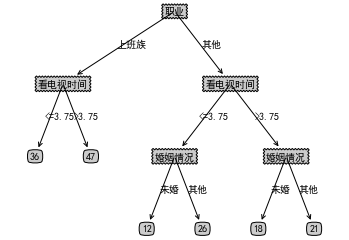

In [113]:
createPlot(myTree)

分类树

In [121]:
dataSet,labels= createDataSet('clf')

In [122]:
dataSet

[['3', '12', '学生', '未婚'],
 ['4', '18', '学生', '未婚'],
 ['2', '26', '老师', '已婚'],
 ['5', '47', '上班族', '已婚'],
 ['2.5', '36', '上班族', '已婚'],
 ['3.5', '29', '老师', '未婚'],
 ['4', '21', '学生', '已婚']]

In [123]:
labels

['看电视时间', '年龄', '职业', '婚姻情况']

In [124]:
myTree = createTree(dataSet,labels,chooseBestFeatureToSplitByCART)

In [125]:
print (myTree)

{'年龄': {'<=19.5': '未婚', '>19.5': {'职业': {'其他': '已婚', '老师': {'看电视时间': {'<=2.75': '已婚', '>2.75': '未婚'}}}}}}


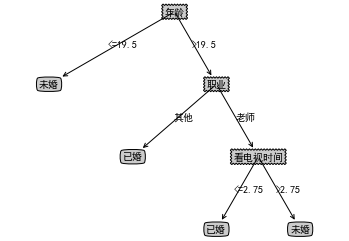

In [126]:
createPlot(myTree)

# 4.Kmeans

##### 来一些合适聚类的数据

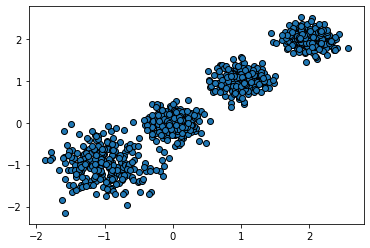

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets.samples_generator import make_blobs
# X为样本特征(坐标)，Y为样本簇， 共1000个样本，每个样本2个特征，共4个簇，簇中心在[-1,-1], [0,0],[1,1], [2,2]， 簇方差分别为[0.4, 0.2, 0.2]
X, y = make_blobs(n_samples=1000, n_features=2, centers=[[-1,-1], [0,0], [1,1], [2,2]], cluster_std=[0.4, 0.2, 0.2, 0.2])
plt.scatter(X[:, 0], X[:, 1], marker='o',edgecolors='k')

##### 开始聚类

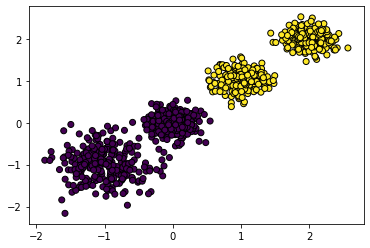

In [3]:
#k=2
from sklearn.cluster import KMeans
y_pred = KMeans(n_clusters=2).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred, marker='o',edgecolors='k')

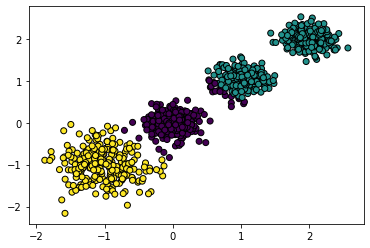

In [4]:
#k=3
y_pred = KMeans(n_clusters=3).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred, marker='o',edgecolors='k')

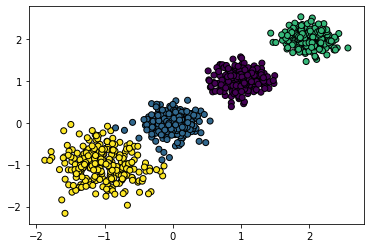

In [5]:
#k=4
y_pred = KMeans(n_clusters=4).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred, marker='o',edgecolors='k')

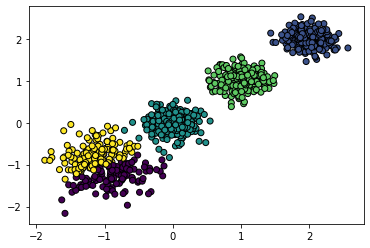

In [6]:
#k=5
y_pred = KMeans(n_clusters=5).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred, marker='o',edgecolors='k')

#### 1. What's the *model*? why  all the models are wrong, but some are useful?
Ans: For CS model is a representation of a system using general rules and concepts sometime a parameterized set of probability distributions,which will output the thing we want with the data as input.

Below is cited from stackoverflow:

"All models are wrong" that is, every model is wrong because it is a simplification of reality. Some models, especially in the "hard" sciences, are only a little wrong. They ignore things like friction or the gravitational effect of tiny bodies. Other models are a lot wrong - they ignore bigger things. In the social sciences, we ignore a lot.

"But some are useful" - simplifications of reality can be quite useful. They can help us explain, predict and understand the universe and all its various components.

#### 2. What's the underfitting and overfitting? List the reasons that could make model overfitting or underfitting.
Ans:Cited from Wikioedia:

In statistics, overfitting is "the production of an analysis that corresponds too closely or exactly to a particular set of data, and may therefore fail to fit additional data or predict future observations reliably". An overfitted model is a statistical model that contains more parameters than can be justified by the data.The essence of overfitting is to have unknowingly extracted some of the residual variation (i.e. the noise) as if that variation represented underlying model structure.

Underfitting occurs when a statistical model cannot adequately capture the underlying structure of the data. An underfitted model is a model where some parameters or terms that would appear in a correctly specified model are missing.Underfitting would occur, for example, when fitting a linear model to non-linear data. Such a model will tend to have poor predictive performance.

Overfitting and underfitting can occur in machine learning, in particular. In machine learning, the phenomena are sometimes called "overtraining" and "undertraining".

Overfitting occurs when a statistical model or machine learning algorithm captures the noise of the data.  Intuitively, overfitting occurs when the model or the algorithm fits the data too well.  Specifically, overfitting occurs if the model or algorithm shows low bias but high variance.  Overfitting is often a result of an excessively complicated model, and it can be prevented by fitting multiple models and using validation or cross-validation to compare their predictive accuracies on test data.

Underfitting occurs when a statistical model or machine learning algorithm cannot capture the underlying trend of the data.  Intuitively, underfitting occurs when the model or the algorithm does not fit the data well enough.  Specifically, underfitting occurs if the model or algorithm shows low variance but high bias.  Underfitting is often a result of an excessively simple model.

Both overfitting and underfitting lead to poor predictions on new data sets.

#### 3. What's the precision, recall, AUC, F1, F2score. What are they mainly target on? 
Ans:
True Positives (TP) - These are the correctly predicted positive values which means that the value of actual class is yes and the value of predicted class is also yes.

True Negatives (TN) - These are the correctly predicted negative values which means that the value of actual class is no and value of predicted class is also no.


False Positives (FP) – When actual class is no and predicted class is yes. 

False Negatives (FN) – When actual class is yes but predicted class in no. 

Precision - Precision is the ratio of correctly predicted positive observations to the total predicted positive observations. 

Precision = TP/TP+FP

Recall (Sensitivity) - Recall is the ratio of correctly predicted positive observations to the all observations in actual class. 

Recall = TP/TP+FN

F1 score - F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy, especially if you have an uneven class distribution. Accuracy works best if false positives and false negatives have similar cost. If the cost of false positives and false negatives are very different, it’s better to look at both Precision and Recall.

F1 Score = 2*(Recall * Precision) / (Recall + Precision)

F2 score - F2 score is similiar with F1 Score.In the case of F2 score, the recall has a higher weight than precision. 

F2 Score = 5*(Recall * Precision) / (Recall + 4\*Precision)
 
AUC:see https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5   

#### 4. Based on our course and yourself mind, what's the machine learning? 
Ans: Machine learning focuses on the development of computer programs that can access data and use it learn for themselves.

Traditional programming is a manual process — meaning a person (programmer) creates the program. But without anyone programming the logic, one has to manually formulate or code rules. We have the input data, and someone (programmer) coded a program that uses that data and runs on a computer to produce the desired output.

In Traditional programming one has to manually formulate/code rules while in Machine Learning the algorithms automatically formulate the rules from the data, which is very powerful. .

#### 5. "正确定义了机器学习模型的评价标准(evaluation)， 问题基本上就已经解决一半". 这句话是否正确？你是怎么看待的？
Ans:我赞同这句话，因为针对不同的业务场景，对业务的理解非常重要-这一点可以体现在模型的评价标准上。问题的另一半在于根据对业务的理解，对模型架构的改进上。

##### Decision Tree的实现都在上面啦

# Linear Regression修改损失函数

$$ loss = \frac{1}{n} \sum{(y_i - \hat{y_i})}^2$$

                                                                 修改为

$$ loss = \frac{1}{n} \sum{|(y_i - \hat{y_i})|}$$

$$ loss = \frac{1}{n} \sum{|(y_i - (kx_i + b_i))|}$$

In [13]:
def loss(y,y_hat):
    return sum(abs((y_i - y_hat_i)) for y_i, y_hat_i in zip(list(y),list(y_hat)))/len(list(y))

$$ \frac{\partial{loss}}{\partial{k}} = -\frac{2}{n}\sum(y_i - \hat{y_i})x_i$$
$$ \frac{\partial{loss}}{\partial{b}} = -\frac{2}{n}\sum(y_i - \hat{y_i})$$

                                                                 修改为

$$ \frac{\partial{loss}}{\partial{k}} = -\frac{1}{n}(\sum_{y_i>\hat{y_i}}{-x_i}+\sum_{y_i<\hat{y_i}}{x_i})$$
$$ \frac{\partial{loss}}{\partial{b}} = \frac{1}{n}(\sum_{y_i>\hat{y_i}}{-1} + \sum_{y_i<\hat{y_i}}{1})$$

In [24]:
def partial_derivative_k(x, y, y_hat):
    n = len(y)
    gradient = 0 
    for x_i, y_i, y_hat_i in zip(x, y, y_hat):
        if y_i > y_hat_i:
            gradient += -x_i
        elif y_i < y_hat_i:
            gradient  += x_i
        else:
            # 偏导数不存在
            n -= 1
    return gradient/ n

def partial_derivative_b(y, y_hat):
    n = len(y)
    gradient = 0
    for y_i, y_hat_i in zip(y, y_hat):
        if y_i > y_hat_i:
            gradient += -1
        elif y_i < y_hat_i:
            gradient += 1
        else:
            # 偏导数不存在
            n -= 1
    return gradient / n

其他的完全一样

In [18]:
from sklearn.datasets import load_boston
import random
dataset = load_boston()
x,y=dataset['data'],dataset['target']

In [19]:
dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

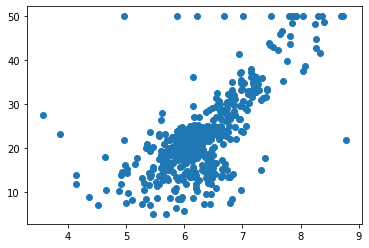

In [20]:
X_rm = x[:,5]
plt.scatter(X_rm,y)

In [22]:
def price(rm, k, b):
    return k * rm + b

In [35]:
k = random.random() * 200 - 100  # -100 100
b = random.random() * 200 - 100  # -100 100

learning_rate = 1e-3

iteration_num = 5000 
#记录下losses之后可以绘图
losses = []
for i in range(iteration_num):
    
    price_use_current_parameters = [price(r, k, b) for r in X_rm]  
    
    current_loss = loss(y, price_use_current_parameters)
    losses.append(current_loss)
    print("Iteration {}, the loss is {}, parameters k is {} and b is {}".format(i,current_loss,k,b))
    
    k_gradient = partial_derivative_k(X_rm, y, price_use_current_parameters)
    b_gradient = partial_derivative_b(y, price_use_current_parameters)
    
    k = k + (-1 * k_gradient) * learning_rate
    b = b + (-1 * b_gradient) * learning_rate
best_k = k
best_b = b

Iteration 0, the loss is 13.449243290415481, parameters k is 4.509003125779245 and b is 6.854838146135307
Iteration 1, the loss is 13.419584559480898, parameters k is 4.503628297716004 and b is 6.853960675779576
Iteration 2, the loss is 13.389925828546305, parameters k is 4.498253469652763 and b is 6.853083205423845
Iteration 3, the loss is 13.36026709761172, parameters k is 4.492878641589522 and b is 6.852205735068114
Iteration 4, the loss is 13.330608366677122, parameters k is 4.487503813526281 and b is 6.851328264712382
Iteration 5, the loss is 13.300949635742533, parameters k is 4.48212898546304 and b is 6.850450794356651
Iteration 6, the loss is 13.271290904807953, parameters k is 4.4767541573997995 and b is 6.84957332400092
Iteration 7, the loss is 13.24163217387336, parameters k is 4.471379329336559 and b is 6.8486958536451885
Iteration 8, the loss is 13.21197344293877, parameters k is 4.466004501273318 and b is 6.847818383289457
Iteration 9, the loss is 13.182314712004173, para

Iteration 522, the loss is 5.862483699296708, parameters k is 2.6523613826962635 and b is 6.536399410957428
Iteration 523, the loss is 5.860825871906338, parameters k is 2.6510989103642477 and b is 6.536146446530551
Iteration 524, the loss is 5.859168044515966, parameters k is 2.649836438032232 and b is 6.535893482103673
Iteration 525, the loss is 5.857523166896182, parameters k is 2.648573965700216 and b is 6.5356405176767955
Iteration 526, the loss is 5.8559529070251966, parameters k is 2.6473342680717575 and b is 6.535391505819088
Iteration 527, the loss is 5.854418860228556, parameters k is 2.6461201870440894 and b is 6.53514644653055
Iteration 528, the loss is 5.852884813431912, parameters k is 2.644906106016421 and b is 6.534901387242013
Iteration 529, the loss is 5.851350766635265, parameters k is 2.643692024988753 and b is 6.534656327953476
Iteration 530, the loss is 5.8498167198386275, parameters k is 2.642477943961085 and b is 6.534411268664939
Iteration 531, the loss is 5.84

Iteration 682, the loss is 5.743105339486107, parameters k is 2.5220650546330226 and b is 6.5073243121431865
Iteration 683, the loss is 5.742890999017264, parameters k is 2.5216185941587144 and b is 6.5072017824989175
Iteration 684, the loss is 5.742676658548414, parameters k is 2.521172133684406 and b is 6.507079252854648
Iteration 685, the loss is 5.742462318079574, parameters k is 2.520725673210098 and b is 6.506956723210379
Iteration 686, the loss is 5.742255859830593, parameters k is 2.52027921273579 and b is 6.50683419356611
Iteration 687, the loss is 5.742072113485886, parameters k is 2.519857831312865 and b is 6.506715616491012
Iteration 688, the loss is 5.7419015276550445, parameters k is 2.51946059218243 and b is 6.506600991985083
Iteration 689, the loss is 5.741749614688904, parameters k is 2.5190868747911255 and b is 6.506490320048324
Iteration 690, the loss is 5.741597701722755, parameters k is 2.518713157399821 and b is 6.506379648111565
Iteration 691, the loss is 5.74144

Iteration 857, the loss is 5.727701354987445, parameters k is 2.474544696925526 and b is 6.490865814119485
Iteration 858, the loss is 5.727662935261124, parameters k is 2.474365335265447 and b is 6.490786762736086
Iteration 859, the loss is 5.727624515534802, parameters k is 2.474185973605368 and b is 6.4907077113526865
Iteration 860, the loss is 5.727586095808479, parameters k is 2.4740066119452893 and b is 6.490628659969287
Iteration 861, the loss is 5.727547676082153, parameters k is 2.4738272502852103 and b is 6.490549608585888
Iteration 862, the loss is 5.727509256355834, parameters k is 2.4736478886251314 and b is 6.490470557202489
Iteration 863, the loss is 5.727470836629506, parameters k is 2.4734685269650525 and b is 6.4903915058190895
Iteration 864, the loss is 5.727432416903182, parameters k is 2.4732891653049736 and b is 6.49031245443569
Iteration 865, the loss is 5.727393997176858, parameters k is 2.4731098036448946 and b is 6.490233403052291
Iteration 866, the loss is 5.7

Iteration 1191, the loss is 5.724447646970389, parameters k is 2.4548926811152283 and b is 6.471134588823067
Iteration 1192, the loss is 5.724445307058524, parameters k is 2.454904544751592 and b is 6.471087157993027
Iteration 1193, the loss is 5.7244429657096045, parameters k is 2.454892210759497 and b is 6.471035774593818
Iteration 1194, the loss is 5.7244405752801075, parameters k is 2.4549040743958606 and b is 6.4709883437637785
Iteration 1195, the loss is 5.724438184850598, parameters k is 2.454915938032224 and b is 6.470940912933739
Iteration 1196, the loss is 5.724435794421086, parameters k is 2.4549278016685876 and b is 6.470893482103699
Iteration 1197, the loss is 5.724433403991584, parameters k is 2.454939665304951 and b is 6.47084605127366
Iteration 1198, the loss is 5.724431060521067, parameters k is 2.4549515289413146 and b is 6.47079862044362
Iteration 1199, the loss is 5.724428722730798, parameters k is 2.45493919494922 and b is 6.470747237044411
Iteration 1200, the loss

Iteration 1486, the loss is 5.72374735057931, parameters k is 2.45720677004801 and b is 6.456948818072082
Iteration 1487, the loss is 5.723744960149804, parameters k is 2.4572186336843735 and b is 6.456901387242042
Iteration 1488, the loss is 5.723742645060257, parameters k is 2.457230497320737 and b is 6.456853956412003
Iteration 1489, the loss is 5.723740278889016, parameters k is 2.4572181633286423 and b is 6.456802573012793
Iteration 1490, the loss is 5.723737888459518, parameters k is 2.457230026965006 and b is 6.456755142182754
Iteration 1491, the loss is 5.723735498030005, parameters k is 2.4572418906013693 and b is 6.456707711352714
Iteration 1492, the loss is 5.723733107600506, parameters k is 2.457253754237733 and b is 6.456660280522675
Iteration 1493, the loss is 5.723730717170994, parameters k is 2.4572656178740964 and b is 6.456612849692635
Iteration 1494, the loss is 5.723728398522794, parameters k is 2.45727748151046 and b is 6.456565418862596
Iteration 1495, the loss is

Iteration 1766, the loss is 5.723084857129595, parameters k is 2.459440216688305 and b is 6.443514035463387
Iteration 1767, the loss is 5.7230825269786685, parameters k is 2.459449187044036 and b is 6.443466604633348
Iteration 1768, the loss is 5.723080196827756, parameters k is 2.459458157399767 and b is 6.443419173803308
Iteration 1769, the loss is 5.7230778666768325, parameters k is 2.4594671277554983 and b is 6.443371742973269
Iteration 1770, the loss is 5.723075536525912, parameters k is 2.4594760981112294 and b is 6.443324312143229
Iteration 1771, the loss is 5.7230732063749885, parameters k is 2.4594850684669605 and b is 6.4432768813131895
Iteration 1772, the loss is 5.72307087622407, parameters k is 2.4594940388226916 and b is 6.44322945048315
Iteration 1773, the loss is 5.723068546073152, parameters k is 2.4595030091784227 and b is 6.44318201965311
Iteration 1774, the loss is 5.723066215922228, parameters k is 2.459511979534154 and b is 6.443134588823071
Iteration 1775, the lo

Iteration 1926, the loss is 5.722712036616305, parameters k is 2.4608541692574564 and b is 6.435921150087889
Iteration 1927, the loss is 5.722709706465387, parameters k is 2.4608631396131875 and b is 6.43587371925785
Iteration 1928, the loss is 5.722707376314467, parameters k is 2.4608721099689186 and b is 6.43582628842781
Iteration 1929, the loss is 5.72270504616354, parameters k is 2.4608810803246497 and b is 6.435778857597771
Iteration 1930, the loss is 5.722702716012619, parameters k is 2.460890050680381 and b is 6.435731426767731
Iteration 1931, the loss is 5.722700385861705, parameters k is 2.460899021036112 and b is 6.4356839959376915
Iteration 1932, the loss is 5.7226980557107785, parameters k is 2.460907991391843 and b is 6.435636565107652
Iteration 1933, the loss is 5.722695725559863, parameters k is 2.460916961747574 and b is 6.435589134277612
Iteration 1934, the loss is 5.72269339540894, parameters k is 2.4609259321033052 and b is 6.435541703447573
Iteration 1935, the loss 

Iteration 2199, the loss is 5.722075912682976, parameters k is 2.463260467676397 and b is 6.422964628348752
Iteration 2200, the loss is 5.722073582532055, parameters k is 2.4632694380321283 and b is 6.4229171975187125
Iteration 2201, the loss is 5.722071252381137, parameters k is 2.4632784083878594 and b is 6.422869766688673
Iteration 2202, the loss is 5.722068922230224, parameters k is 2.4632873787435905 and b is 6.422822335858633
Iteration 2203, the loss is 5.722066592079292, parameters k is 2.4632963490993216 and b is 6.422774905028594
Iteration 2204, the loss is 5.7220642619283755, parameters k is 2.4633053194550527 and b is 6.422727474198554
Iteration 2205, the loss is 5.722061931777456, parameters k is 2.463314289810784 and b is 6.422680043368515
Iteration 2206, the loss is 5.722059601626531, parameters k is 2.463323260166515 and b is 6.422632612538475
Iteration 2207, the loss is 5.722057271475615, parameters k is 2.463332230522246 and b is 6.422585181708436
Iteration 2208, the l

Iteration 2385, the loss is 5.721642508245764, parameters k is 2.4649076494945574 and b is 6.414138541392226
Iteration 2386, the loss is 5.721640178094847, parameters k is 2.4649166198502885 and b is 6.414091110562186
Iteration 2387, the loss is 5.721637847943925, parameters k is 2.4649255902060196 and b is 6.4140436797321465
Iteration 2388, the loss is 5.7216355177930085, parameters k is 2.4649345605617508 and b is 6.413996248902107
Iteration 2389, the loss is 5.721633187642081, parameters k is 2.464943530917482 and b is 6.413948818072067
Iteration 2390, the loss is 5.721630857491163, parameters k is 2.464952501273213 and b is 6.413901387242028
Iteration 2391, the loss is 5.721628527340239, parameters k is 2.464961471628944 and b is 6.413853956411988
Iteration 2392, the loss is 5.7216261971893205, parameters k is 2.464970441984675 and b is 6.413806525581949
Iteration 2393, the loss is 5.721623867038407, parameters k is 2.4649794123404063 and b is 6.413759094751909
Iteration 2394, the 

Iteration 2706, the loss is 5.720894540702214, parameters k is 2.4677232206407655 and b is 6.39890138724202
Iteration 2707, the loss is 5.720892210551289, parameters k is 2.4677321909964967 and b is 6.398853956411981
Iteration 2708, the loss is 5.720889880400377, parameters k is 2.4677411613522278 and b is 6.398806525581941
Iteration 2709, the loss is 5.720887550249455, parameters k is 2.467750131707959 and b is 6.3987590947519015
Iteration 2710, the loss is 5.720885220098534, parameters k is 2.46775910206369 and b is 6.398711663921862
Iteration 2711, the loss is 5.720882889947606, parameters k is 2.467768072419421 and b is 6.398664233091822
Iteration 2712, the loss is 5.720880559796692, parameters k is 2.467777042775152 and b is 6.398616802261783
Iteration 2713, the loss is 5.720878229645765, parameters k is 2.4677860131308833 and b is 6.398569371431743
Iteration 2714, the loss is 5.7208758994948505, parameters k is 2.4677949834866144 and b is 6.398521940601704
Iteration 2715, the los

Iteration 2909, the loss is 5.72042156543042, parameters k is 2.4694764479134697 and b is 6.389261071036482
Iteration 2910, the loss is 5.7204192352795085, parameters k is 2.4694854182692008 and b is 6.389213640206442
Iteration 2911, the loss is 5.720416905128583, parameters k is 2.469494388624932 and b is 6.389166209376403
Iteration 2912, the loss is 5.720414574977667, parameters k is 2.469503358980663 and b is 6.389118778546363
Iteration 2913, the loss is 5.7204122448267505, parameters k is 2.469512329336394 and b is 6.389071347716324
Iteration 2914, the loss is 5.720409914675832, parameters k is 2.469521299692125 and b is 6.389023916886284
Iteration 2915, the loss is 5.7204075845249065, parameters k is 2.4695302700478563 and b is 6.388976486056245
Iteration 2916, the loss is 5.720405254373988, parameters k is 2.4695392404035874 and b is 6.388929055226205
Iteration 2917, the loss is 5.720402924223063, parameters k is 2.4695482107593185 and b is 6.3888816243961655
Iteration 2918, the 

Iteration 3092, the loss is 5.719995293870783, parameters k is 2.470955445937165 and b is 6.380553561155056
Iteration 3093, the loss is 5.719992963719854, parameters k is 2.470964416292896 and b is 6.380506130325016
Iteration 3094, the loss is 5.719990633568937, parameters k is 2.470973386648627 and b is 6.380458699494977
Iteration 3095, the loss is 5.7199883034180194, parameters k is 2.4709823570043583 and b is 6.380411268664937
Iteration 3096, the loss is 5.719985973267099, parameters k is 2.4709913273600894 and b is 6.3803638378348975
Iteration 3097, the loss is 5.719983643116176, parameters k is 2.4710002977158205 and b is 6.380316407004858
Iteration 3098, the loss is 5.719981312965255, parameters k is 2.4710092680715516 and b is 6.380268976174818
Iteration 3099, the loss is 5.719978982814328, parameters k is 2.4710182384272827 and b is 6.380221545344779
Iteration 3100, the loss is 5.719976652663417, parameters k is 2.471027208783014 and b is 6.380174114514739
Iteration 3101, the l

Iteration 3366, the loss is 5.719357041173992, parameters k is 2.4731810704430637 and b is 6.367517988032521
Iteration 3367, the loss is 5.7193547110230725, parameters k is 2.473190040798795 and b is 6.3674705572024815
Iteration 3368, the loss is 5.719352380872154, parameters k is 2.473199011154526 and b is 6.367423126372442
Iteration 3369, the loss is 5.719350050721234, parameters k is 2.473207981510257 and b is 6.367375695542402
Iteration 3370, the loss is 5.719347720570311, parameters k is 2.473216951865988 and b is 6.367328264712363
Iteration 3371, the loss is 5.719345390419386, parameters k is 2.473225922221719 and b is 6.367280833882323
Iteration 3372, the loss is 5.7193430602684705, parameters k is 2.4732348925774503 and b is 6.367233403052284
Iteration 3373, the loss is 5.71934073011755, parameters k is 2.4732438629331814 and b is 6.367185972222244
Iteration 3374, the loss is 5.719338399966627, parameters k is 2.4732528332889125 and b is 6.367138541392205
Iteration 3375, the lo

Iteration 3876, the loss is 5.718169060649857, parameters k is 2.4773146712335214 and b is 6.343253165898124
Iteration 3877, the loss is 5.718166730498926, parameters k is 2.4773236415892526 and b is 6.343205735068085
Iteration 3878, the loss is 5.718164400348008, parameters k is 2.4773326119449837 and b is 6.343158304238045
Iteration 3879, the loss is 5.7181620701970965, parameters k is 2.4773415823007148 and b is 6.343110873408006
Iteration 3880, the loss is 5.7181597400461674, parameters k is 2.477350552656446 and b is 6.343063442577966
Iteration 3881, the loss is 5.7181574098952535, parameters k is 2.477359523012177 and b is 6.343016011747927
Iteration 3882, the loss is 5.718155079744334, parameters k is 2.477368493367908 and b is 6.342968580917887
Iteration 3883, the loss is 5.718152749593412, parameters k is 2.477377463723639 and b is 6.3429211500878475
Iteration 3884, the loss is 5.718150419442494, parameters k is 2.4773864340793703 and b is 6.342873719257808
Iteration 3885, the

Iteration 4154, the loss is 5.717521508214926, parameters k is 2.479552951865902 and b is 6.330023916886262
Iteration 4155, the loss is 5.717519178064, parameters k is 2.479561922221633 and b is 6.329976486056222
Iteration 4156, the loss is 5.717516847913081, parameters k is 2.4795708925773643 and b is 6.329929055226183
Iteration 4157, the loss is 5.71751451776216, parameters k is 2.4795798629330954 and b is 6.329881624396143
Iteration 4158, the loss is 5.717512187611237, parameters k is 2.4795888332888265 and b is 6.3298341935661036
Iteration 4159, the loss is 5.717509857460323, parameters k is 2.4795978036445576 and b is 6.329786762736064
Iteration 4160, the loss is 5.717507527309401, parameters k is 2.4796067740002887 and b is 6.3297393319060244
Iteration 4161, the loss is 5.717505197158477, parameters k is 2.47961574435602 and b is 6.329691901075985
Iteration 4162, the loss is 5.717502867007564, parameters k is 2.479624714711751 and b is 6.329644470245945
Iteration 4163, the loss i

Iteration 4500, the loss is 5.716715547248487, parameters k is 2.482354766095113 and b is 6.31356146629337
Iteration 4501, the loss is 5.7167132170975625, parameters k is 2.482363736450844 and b is 6.313514035463331
Iteration 4502, the loss is 5.716710886946648, parameters k is 2.4823727068065753 and b is 6.313466604633291
Iteration 4503, the loss is 5.71670855679573, parameters k is 2.4823816771623064 and b is 6.3134191738032515
Iteration 4504, the loss is 5.716706226644801, parameters k is 2.4823906475180375 and b is 6.313371742973212
Iteration 4505, the loss is 5.716703896493888, parameters k is 2.4823996178737686 and b is 6.313324312143172
Iteration 4506, the loss is 5.716701566342965, parameters k is 2.4824085882294997 and b is 6.313276881313133
Iteration 4507, the loss is 5.716699236192049, parameters k is 2.482417558585231 and b is 6.313229450483093
Iteration 4508, the loss is 5.716696906041132, parameters k is 2.482426528940962 and b is 6.313182019653054
Iteration 4509, the los

Iteration 4880, the loss is 5.715830382016309, parameters k is 2.4854383471227393 and b is 6.295482414909964
Iteration 4881, the loss is 5.715828051865383, parameters k is 2.4854473174784704 and b is 6.295434984079924
Iteration 4882, the loss is 5.7158257217144595, parameters k is 2.4854562878342015 and b is 6.295387553249885
Iteration 4883, the loss is 5.715823391563541, parameters k is 2.4854652581899326 and b is 6.295340122419845
Iteration 4884, the loss is 5.715821061412622, parameters k is 2.4854742285456637 and b is 6.295292691589806
Iteration 4885, the loss is 5.7158187312617015, parameters k is 2.485483198901395 and b is 6.295245260759766
Iteration 4886, the loss is 5.715816401110785, parameters k is 2.485492169257126 and b is 6.295197829929727
Iteration 4887, the loss is 5.715814070959864, parameters k is 2.485501139612857 and b is 6.295150399099687
Iteration 4888, the loss is 5.71581174080894, parameters k is 2.485510109968588 and b is 6.2951029682696475
Iteration 4889, the l

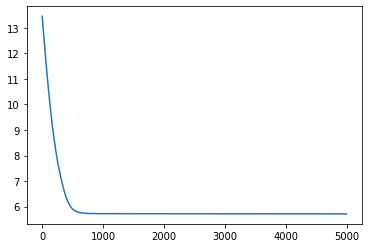

In [36]:
plt.plot(list(range(iteration_num)),losses)

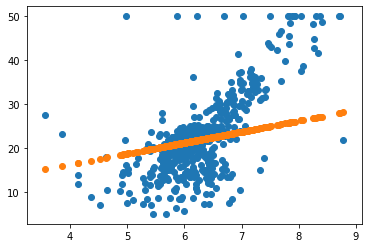

In [37]:
plt.scatter(X_rm,y)
plt.scatter(X_rm,price_use_current_parameters)

上次训练几十次损失就可以收敛，这次的话训练了好几百次才能收敛，而且5000次训练拟合的也不行。我们从损失函数的梯度中可以看出，MSE每次返回的梯度还包括了y和y_hat的差值度量。所以损失函数绝对是MSE更好。